In [95]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [64]:
data = pd.read_csv("C:/Users/gordee-ext/OneDrive - Louis Dreyfus Company/Desktop/Netology/Моудль 4/Задание 3/geo.csv")

In [84]:
y=data['comment_class']
x=data[['x','y']]

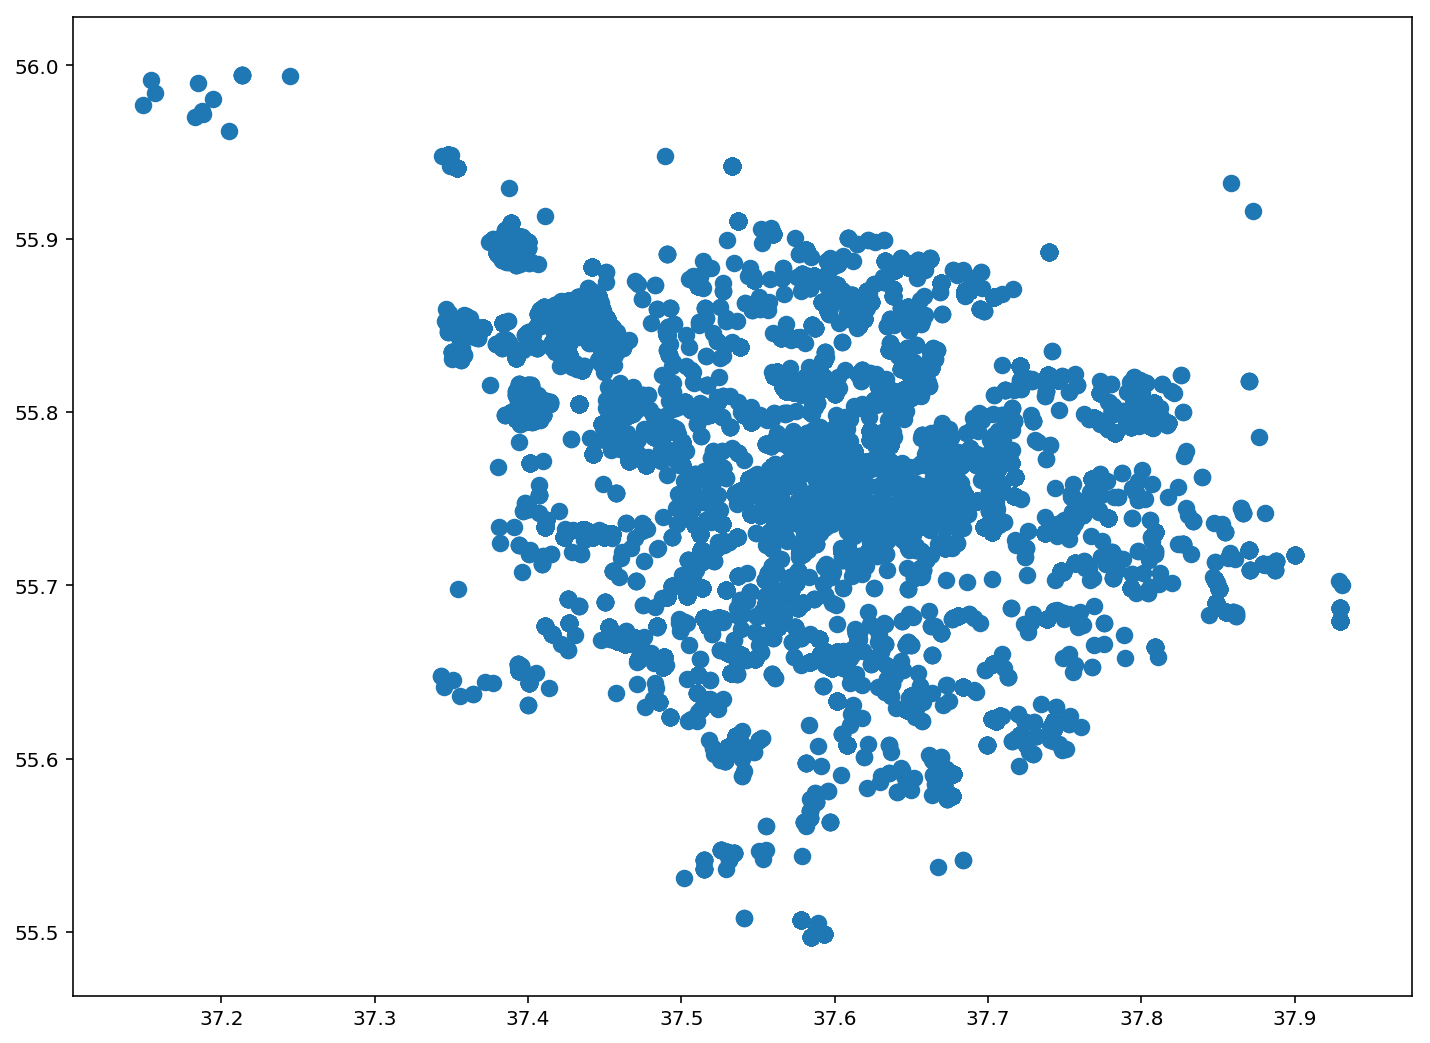

In [93]:
plt.scatter(x['x'], x['y'], cmap='autumn', s=60)

In [100]:
scaler = StandardScaler()

In [101]:
x_scaled = scaler.fit_transform(x)

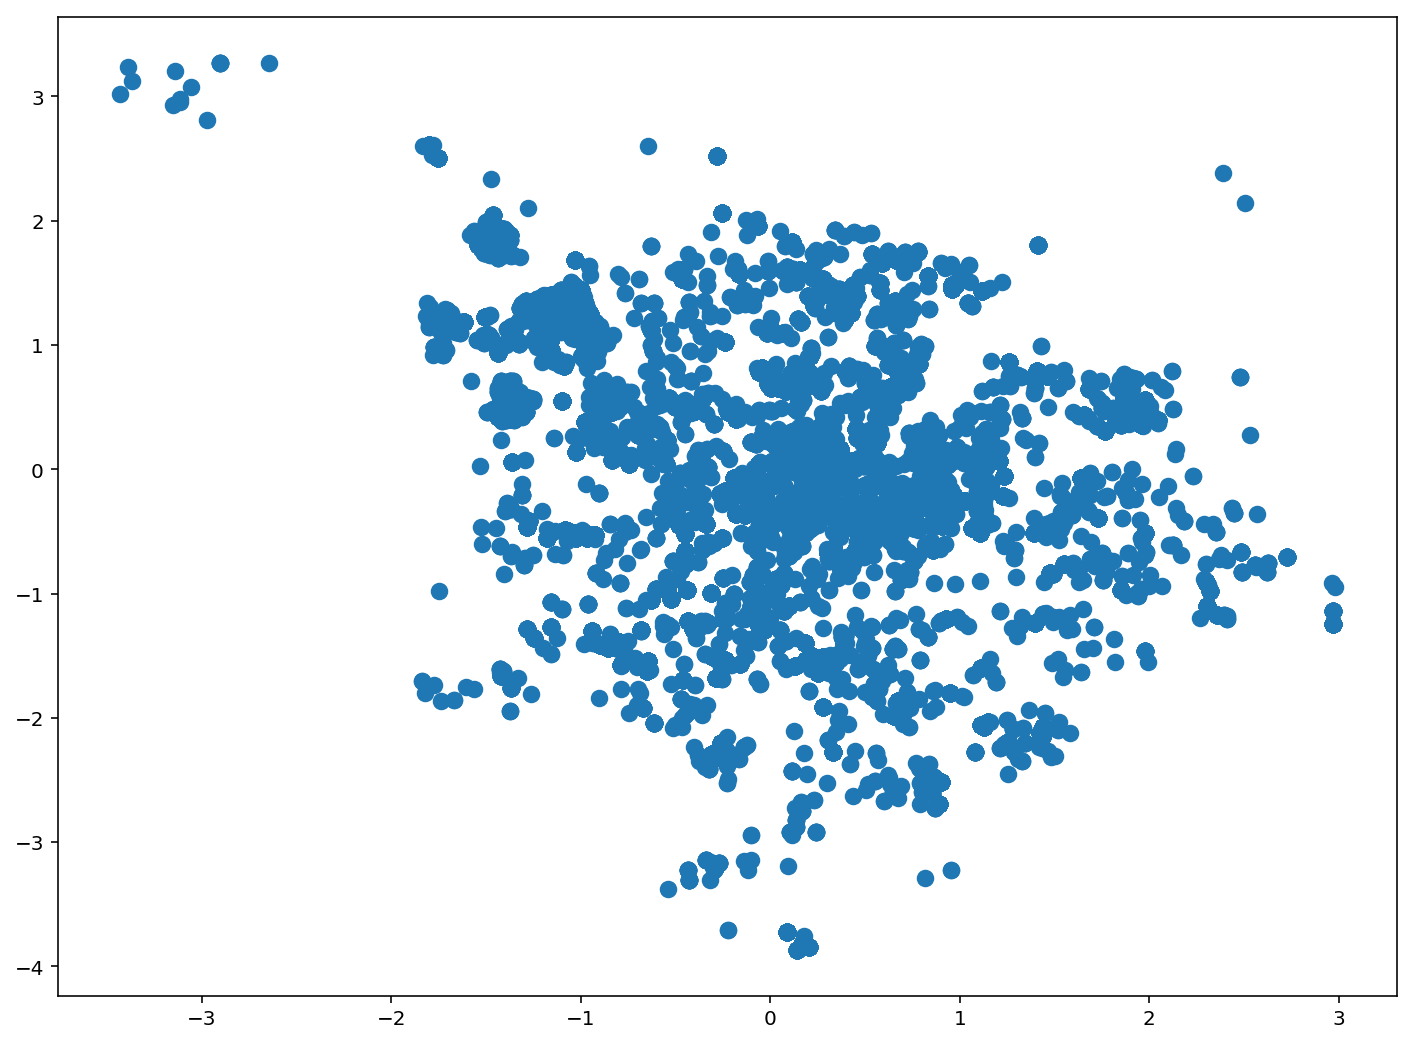

In [102]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], cmap='autumn', s=60)

In [115]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_scaled)
clusters = kmeans.predict(x_scaled)

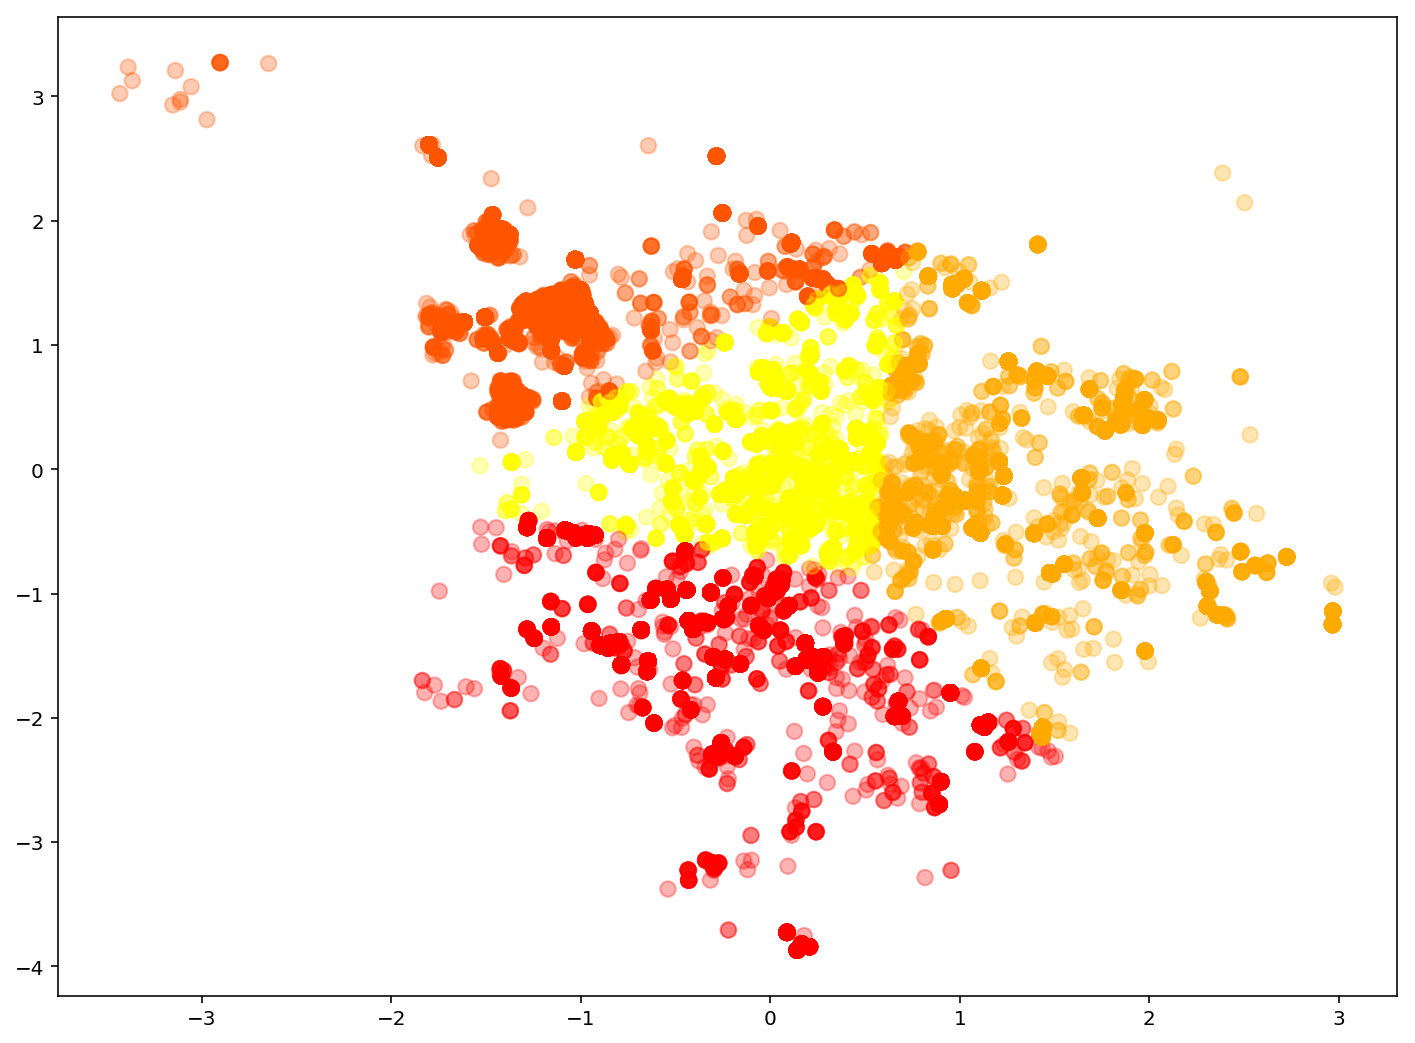

In [116]:
alpha = 0.3
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)

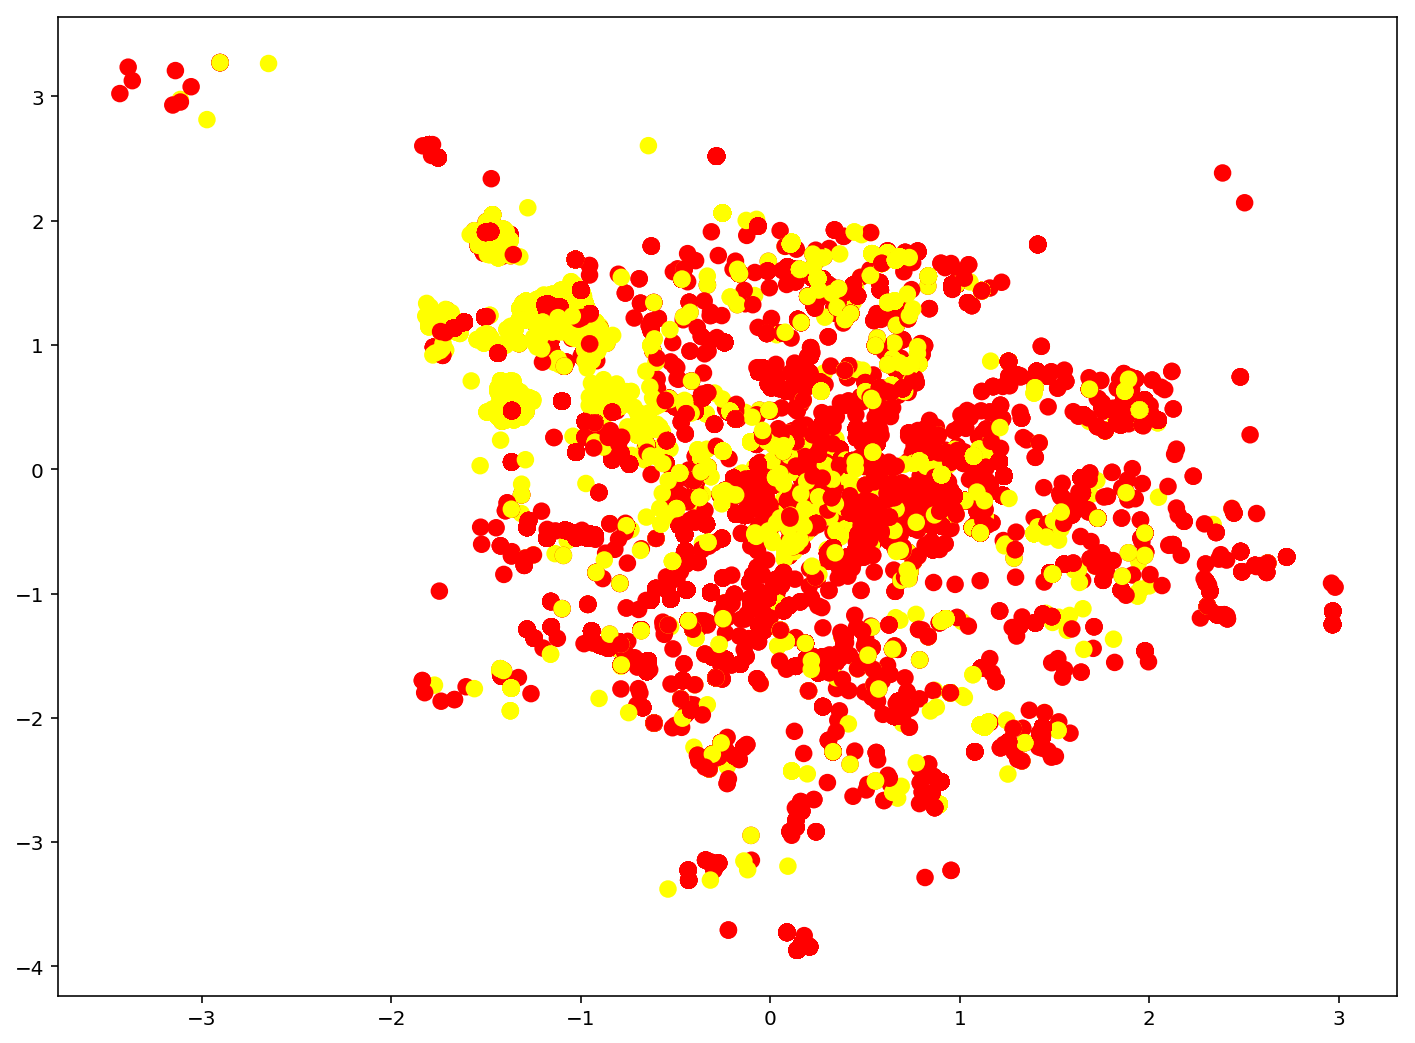

In [121]:
#По голосам
plt.scatter(x_scaled[:,0], x_scaled[:,1],c=y, cmap='autumn', s=60)

In [123]:
#Подбор оптимального количество кластеров
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(x_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

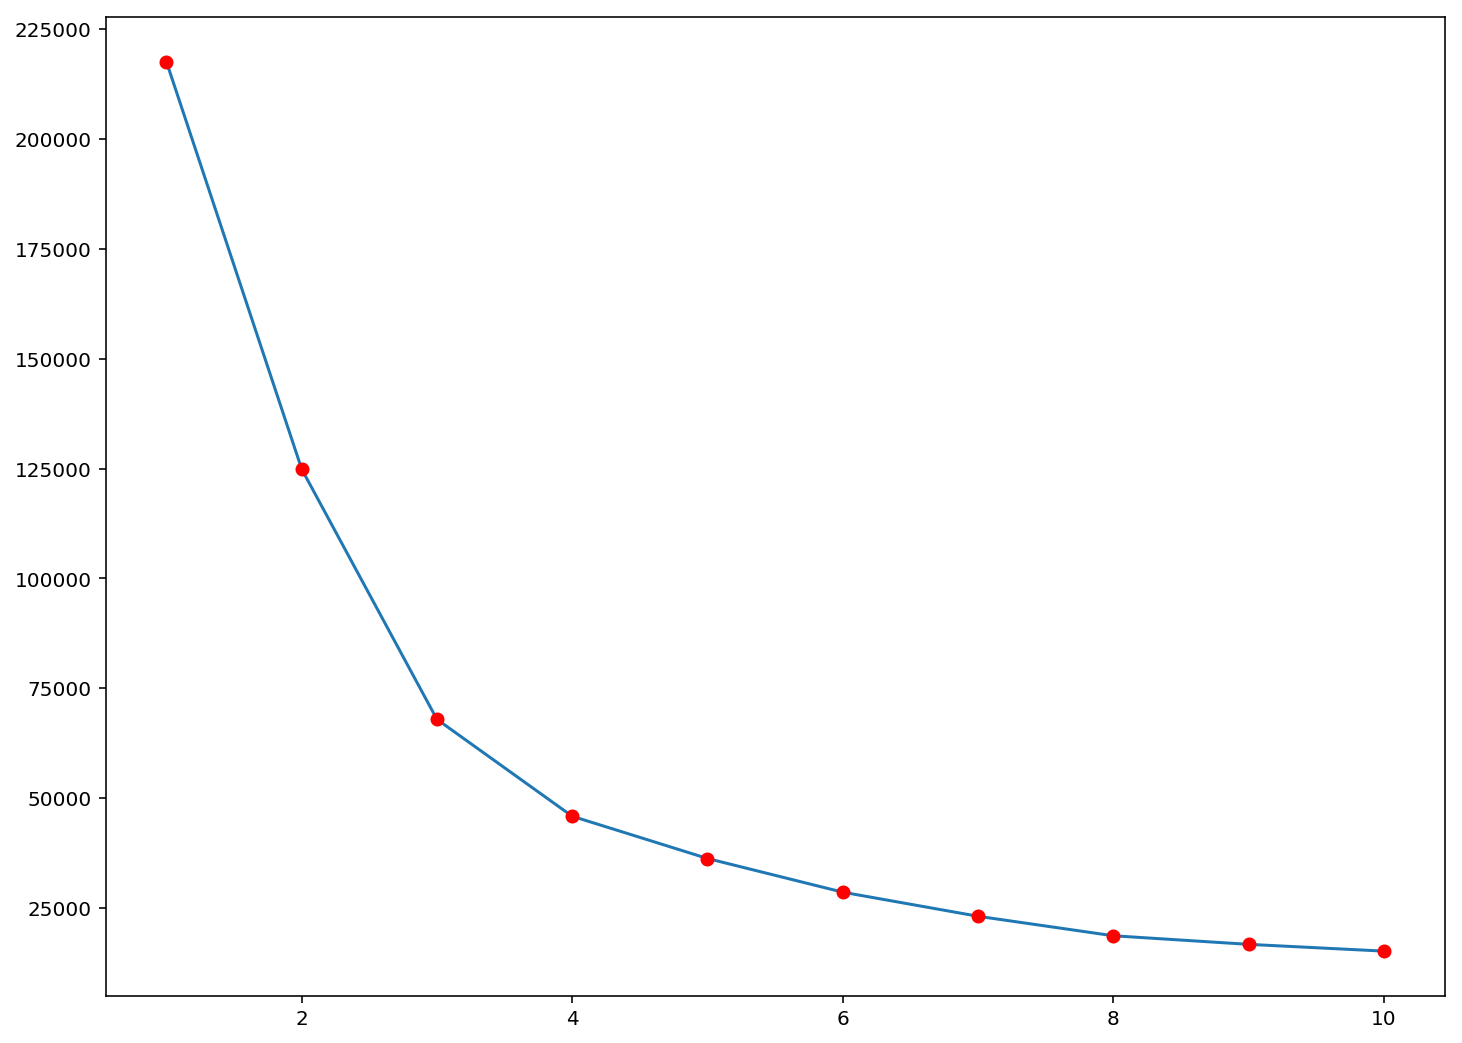

In [124]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [125]:
diff = np.diff(k_inertia)

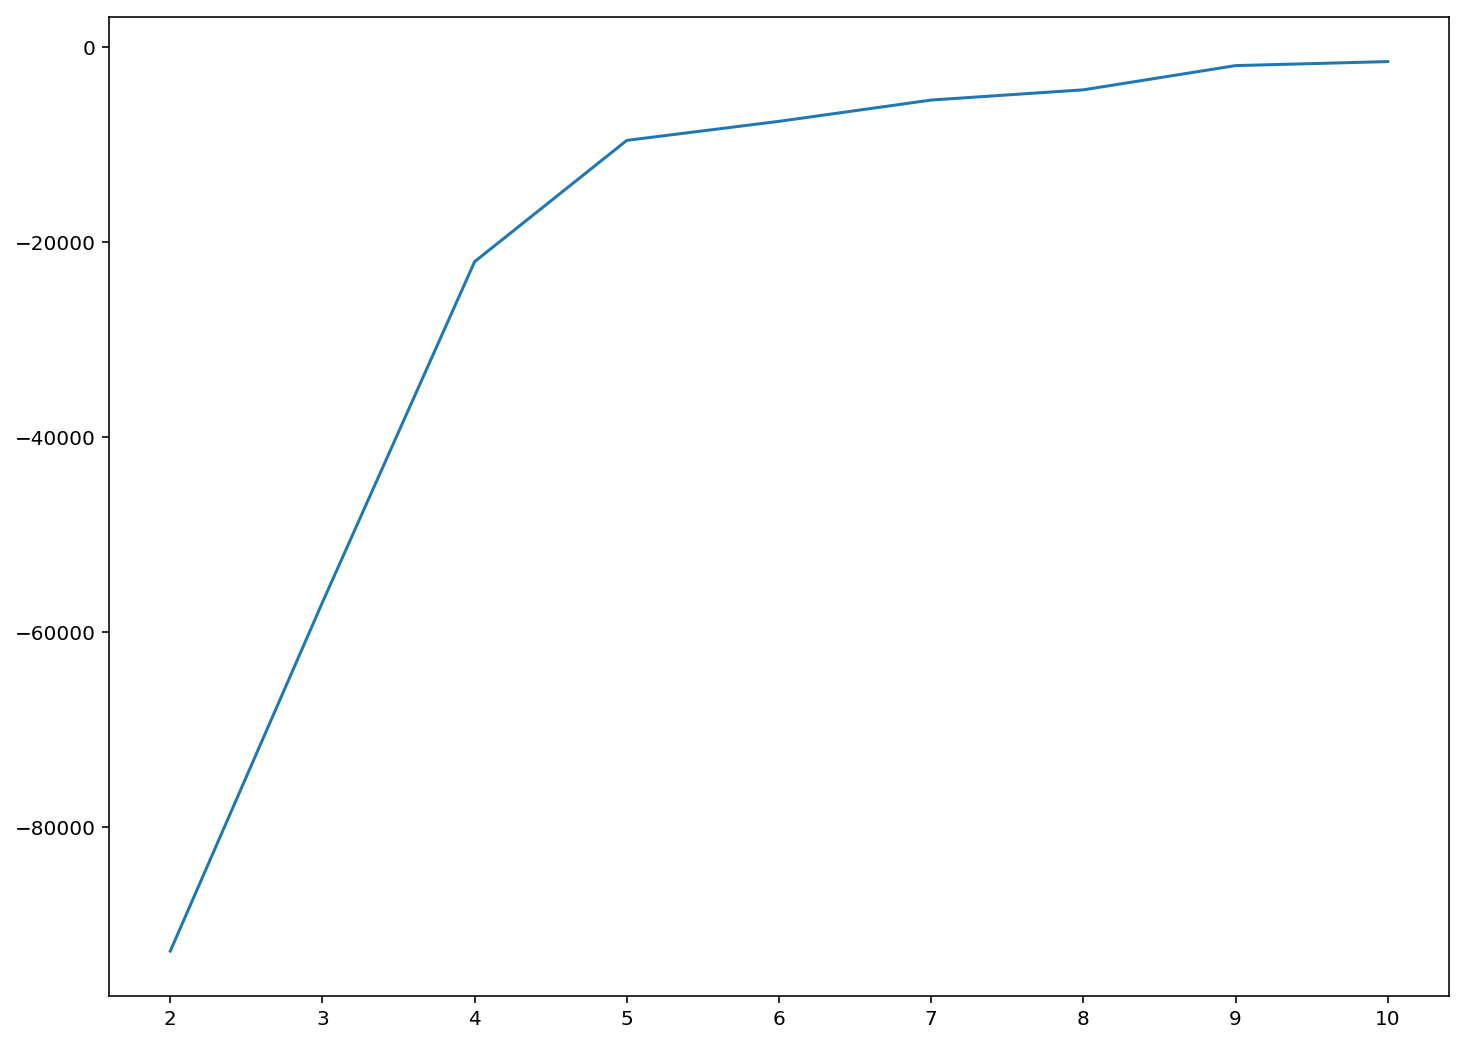

In [126]:
plt.plot(ks[1:], diff)

In [127]:
diff_r = diff[1:] / diff[:-1]

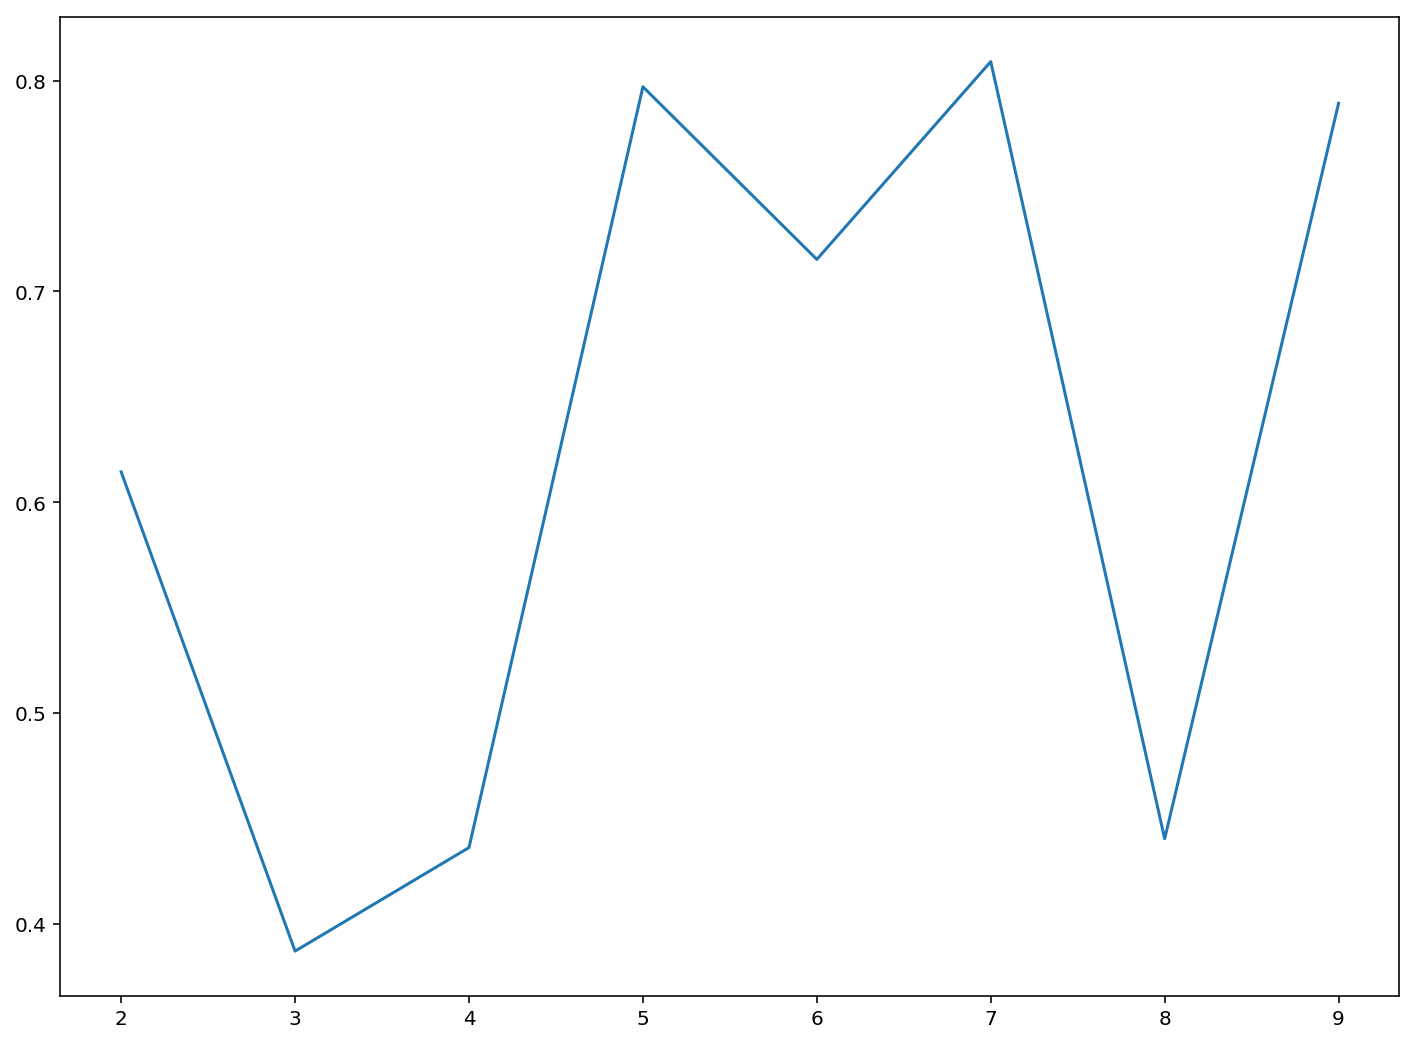

In [128]:
plt.plot(ks[1:-1], diff_r)

In [129]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3